# Import thư viện cần thiết

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import pickle
import time

# Load dữ liệu 

Sử dụng dữ liệu đã được xóa stopword

In [4]:
data = pd.read_excel("../dataset/final_data2.xlsx")

In [5]:
data.dropna(inplace=True)

In [6]:
data.isna().sum()

Rate                 0
Review               0
Label                0
Preprocess_Review    0
dtype: int64

# Xây dựng mô hình phân lớp

In [7]:
# Trích xuất đặc trưng
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer

# Mô hình phân lớp
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection
from sklearn.model_selection import train_test_split

# Đánh giá
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
reviews = data["Preprocess_Review"]
labels = data["Label"]

In [9]:
labels.value_counts()

 1    6717
-1    3275
 0    1161
Name: Label, dtype: int64

## 1. Train/Test split

In [10]:
train_x, test_x, train_y, test_y = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

In [11]:
train_y.value_counts()


 1    5373
-1    2620
 0     929
Name: Label, dtype: int64

In [12]:
test_y.value_counts()


 1    1344
-1     655
 0     232
Name: Label, dtype: int64

## 2. Wordcloud từng lớp

In [13]:
from wordcloud import WordCloud

In [14]:
np_train_x = np.array(train_x)
np_train_y = np.array(train_y)

### 2.1 Tích cực

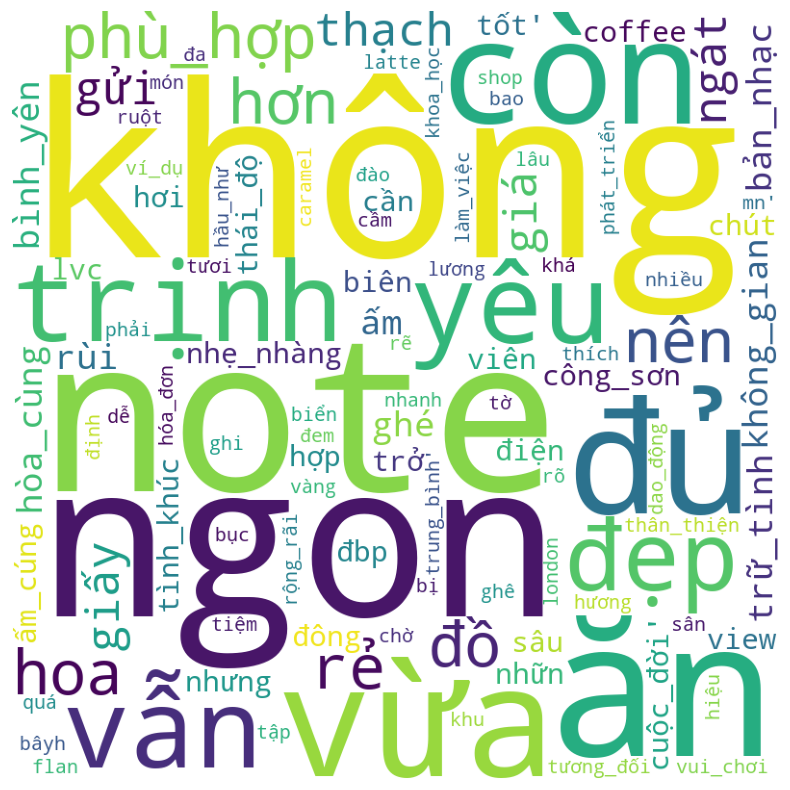

In [15]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.2 Trung lập

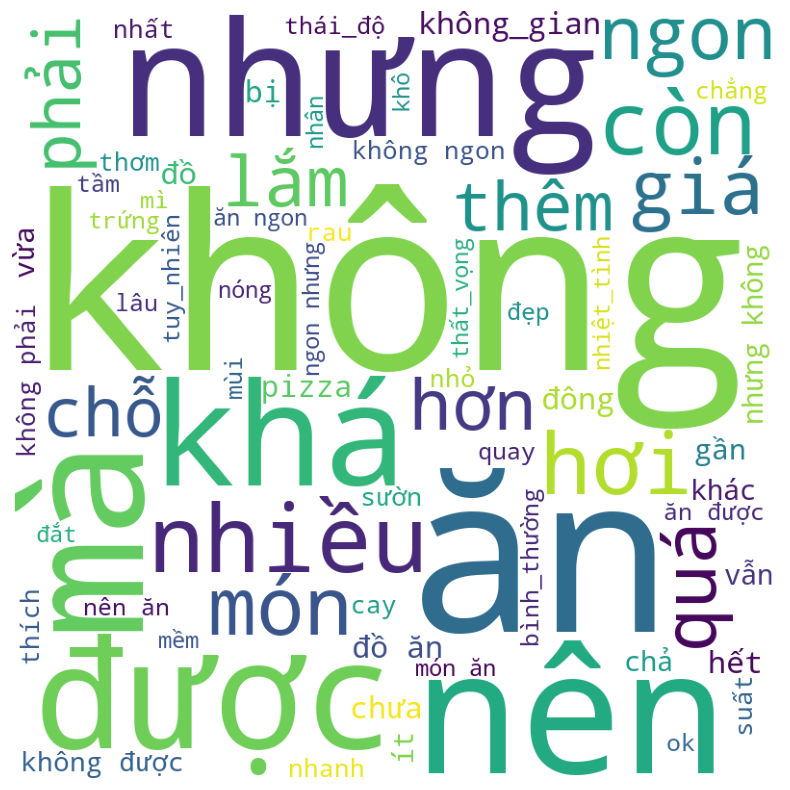

In [16]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == 0)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### 2.3 Tiêu cực

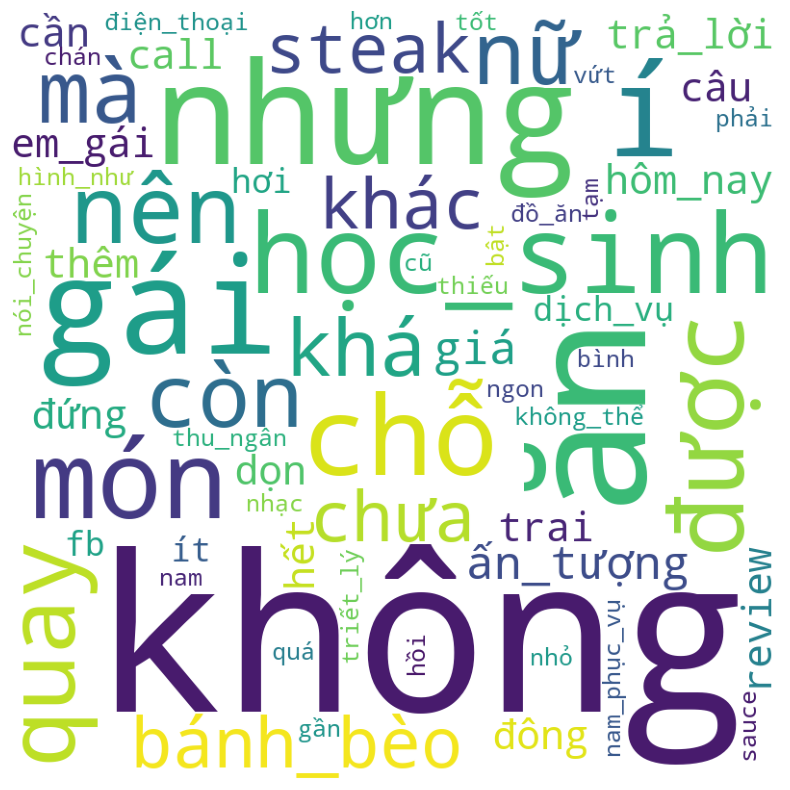

In [17]:
wordcloud = WordCloud(width=800, height=800, background_color='white', max_words=1000,
                      min_font_size=20).generate(str(np_train_x[np.where(np_train_y == -1)]))

fig = plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## 3. Trích xuất đặc trưng bằng TF-IDF

In [18]:
# Tạo đối tượng TfidfVectorizer
tfidf = TfidfVectorizer()

# Biến đổi tập huấn luyện thành ma trận TF-IDF
train_x_tfidf = tfidf.fit_transform(train_x)

# Biến đổi tập kiểm tra thành ma trận TF-IDF
test_x_tfidf = tfidf.transform(test_x)

## 4. Huấn luyện một số mô hình Machine Learning 

In [19]:
def display_result(model):
  print(classification_report(test_y, pred_y))
  plt.figure(figsize=(5, 3))
  conf_matrix = confusion_matrix(test_y, pred_y, labels=labels.unique())
  sb.heatmap(conf_matrix, annot=True, fmt='g', cmap='YlOrRd')

### 4.1 KNN

In [20]:
knn = KNeighborsClassifier()
start = time.time()
knn.fit(train_x_tfidf, train_y)
print('KNN training time: %d' %(time.time() - start))

KNN training time: 0


In [21]:
start = time.time()
pred_y = knn.predict(test_x_tfidf)
print('KNN testing time: %d' %(time.time() - start))

KNN testing time: 3


              precision    recall  f1-score   support

          -1       0.59      0.59      0.59       655
           0       0.21      0.06      0.09       232
           1       0.74      0.84      0.79      1344

    accuracy                           0.68      2231
   macro avg       0.51      0.49      0.49      2231
weighted avg       0.64      0.68      0.66      2231



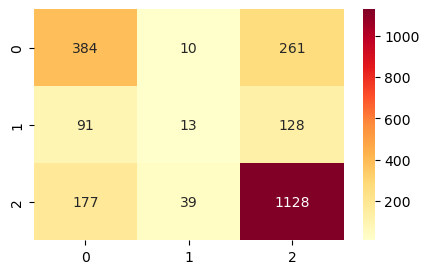

In [22]:
display_result(knn)

### 4.2 Multinomial Naive Bayes

In [23]:
mnb = MultinomialNB()
start = time.time()
mnb.fit(train_x_tfidf, train_y)
print('Multinomial Naive Bayes training time: %d' %(time.time() - start))

Multinomial Naive Bayes training time: 0


In [24]:
start = time.time()
pred_y = mnb.predict(test_x_tfidf)
print('Multinomial Naive Bayes testing time: %d' %(time.time() - start))

Multinomial Naive Bayes testing time: 0


              precision    recall  f1-score   support

          -1       0.91      0.46      0.62       655
           0       0.00      0.00      0.00       232
           1       0.70      0.99      0.82      1344

    accuracy                           0.74      2231
   macro avg       0.54      0.49      0.48      2231
weighted avg       0.69      0.74      0.68      2231



/home/ducbui/anaconda3/envs/UIT/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ducbui/anaconda3/envs/UIT/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ducbui/anaconda3/envs/UIT/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


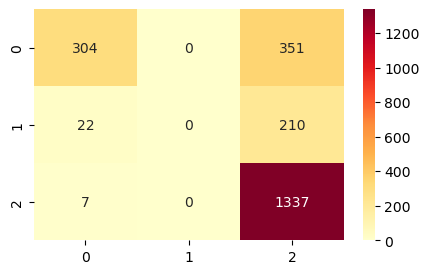

In [25]:
display_result(mnb)

### 4.3 Logistic regression

In [26]:
lgres = LogisticRegression()
start = time.time()
lgres.fit(train_x_tfidf, train_y)
print('Logistic training time: %d' %(time.time() - start))

Logistic training time: 0


In [27]:
start = time.time()
pred_y = lgres.predict(test_x_tfidf)
print('Logistic regression testing time: %d' %(time.time() - start))

Logistic regression testing time: 0


              precision    recall  f1-score   support

          -1       0.80      0.80      0.80       655
           0       0.30      0.05      0.08       232
           1       0.83      0.95      0.89      1344

    accuracy                           0.81      2231
   macro avg       0.64      0.60      0.59      2231
weighted avg       0.77      0.81      0.78      2231



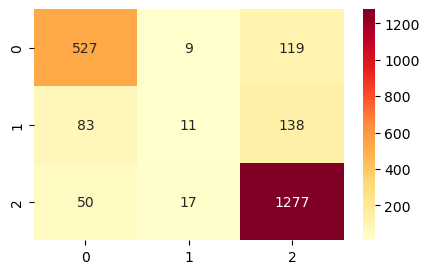

In [28]:
display_result(lgres)

### 4.4 SVM

In [29]:
svm = SVC(random_state=42)
start = time.time()
svm.fit(train_x_tfidf, train_y)
print('SVM training time: %d' %(time.time() - start))

SVM training time: 14


In [30]:
start = time.time()
pred_y = svm.predict(test_x_tfidf)
print('SVM testing time: %d' %(time.time() - start))

SVM testing time: 2


              precision    recall  f1-score   support

          -1       0.80      0.81      0.81       655
           0       0.39      0.03      0.06       232
           1       0.83      0.96      0.89      1344

    accuracy                           0.82      2231
   macro avg       0.67      0.60      0.58      2231
weighted avg       0.78      0.82      0.78      2231



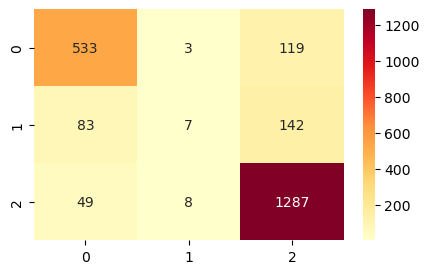

In [31]:
display_result(svm)

### 3.5 Decision Tree

In [32]:
tree = DecisionTreeClassifier(random_state=42)
start = time.time()
tree.fit(train_x_tfidf, train_y)
print('Decision Tree training time: %d' %(time.time() - start))

Decision Tree training time: 1


In [33]:
start = time.time()
pred_y = tree.predict(test_x_tfidf)
print('Decision Tree testing time: %d' %(time.time() - start))

Decision Tree testing time: 0


              precision    recall  f1-score   support

          -1       0.61      0.63      0.62       655
           0       0.18      0.16      0.17       232
           1       0.79      0.79      0.79      1344

    accuracy                           0.68      2231
   macro avg       0.53      0.53      0.53      2231
weighted avg       0.67      0.68      0.68      2231



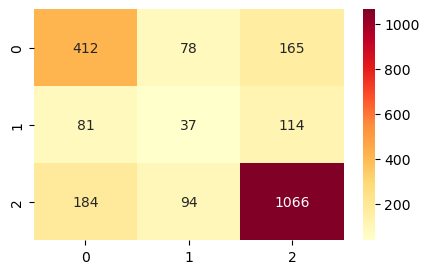

In [34]:
display_result(tree)

### 4.5. Random Forest

In [35]:
rf = RandomForestClassifier(random_state=42)
start = time.time()
rf.fit(train_x_tfidf, train_y)
print('rf training time: %d' %(time.time() - start))

rf training time: 9


In [36]:
start = time.time()
pred_y = rf.predict(test_x_tfidf)
print('Random Forest testing time: %d' %(time.time() - start))

Random Forest testing time: 0


              precision    recall  f1-score   support

          -1       0.78      0.74      0.76       655
           0       0.10      0.00      0.01       232
           1       0.80      0.96      0.87      1344

    accuracy                           0.79      2231
   macro avg       0.56      0.57      0.55      2231
weighted avg       0.72      0.79      0.75      2231



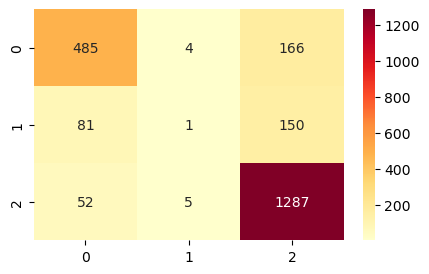

In [37]:
display_result(rf)

# Tổng kết và nhận xét

Tập dữ liệu ban đầu sau khi trải qua các bước tiền xử lí đề xuất, được chia thành 2 phần để train và test. Trong đó có 80% dùng để train và 20% còn lại để test. Huấn luyện các mô hình trên cấu hình mặc định của sklearn, sau đó dự đoán trên tập test. Kết quả thu được ở bảng sau

|<center><div style="width:150px"></div><center>|<center><div style="width:290px">Macro avg F1-score </div><center>|<center><div style="width:290px">Weighted avg F1-score </div><center>|
|---------- |:-------------:|:-------------:|
|KNN|<center>0.49<center>|<center>0.66<center>|
|Naïve Bayes|<center>0.48<center>|<center>0.68<center>|
|Logistic Regression|<center>0.59<center> |<center>0.78<center>|
|SVM| <center>0.58<center> |<center>0.78<center>|
|Decision Tree| <center>0.53<center> |<center>0.68<center>|
|Random Forest| <center>0.55<center> |<center>0.75<center>|
